In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
commerce = pd.read_csv("Ecommerce.csv", encoding='ISO-8859-1')

In [3]:
commerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [4]:
commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [5]:
commerce.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909,0.0
unique,25900,4070,4223,NaN,305,NaN,NaN,38,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,3-Dec-17,NaN,NaN,United Kingdom,NaN
freq,1114,2313,2369,NaN,5331,NaN,NaN,495478,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN,NaN


In [6]:
commerce = commerce.drop(columns = "Unnamed: 8")
commerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [9]:
commerce["Quantity"] = commerce["Quantity"].abs()
commerce["UnitPrice"] = commerce["UnitPrice"].abs()
commerce.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540397,581480,22112,CHOCOLATE HOT WATER BOTTLE,6,7-Dec-17,4.95,14441.0,United Kingdom
505100,579001,23209,LUNCH BAG VINTAGE DOILY,3,25-Nov-17,1.65,15555.0,United Kingdom
372184,569234,21925,UNION STRIPE CUSHION COVER,1,30-Sep-17,1.25,17841.0,United Kingdom
482478,577474,22420,LIPSTICK PEN BABY PINK,12,18-Nov-17,0.42,12778.0,Netherlands
161540,550474,22636,CHILDS BREAKFAST SET CIRCUS PARADE,1,16-Apr-17,16.63,NaN,United Kingdom
340677,566709,22900,SET 2 TEA TOWELS I LOVE LONDON,10,12-Sep-17,3.25,16745.0,United Kingdom
115517,546133,22502,PICNIC BASKET WICKER SMALL,4,7-Mar-17,5.95,14291.0,United Kingdom
207225,554979,21294,ETCHED GLASS COASTER,12,27-May-17,0.39,16931.0,United Kingdom
92006,544167,22192,BLUE DINER WALL CLOCK,2,14-Feb-17,8.50,14755.0,United Kingdom
534746,581167,20712,JUMBO BAG WOODLAND ANIMALS,20,5-Dec-17,2.08,13534.0,United Kingdom


In [12]:
commerce.Country.replace(["Unspecified", "EIRE", "RSA", "USA"], ["United Kingdom", "Ireland", "Republic of South Africa", "United States of America"], inplace = True)
commerce.Country.value_counts().head()

United Kingdom    495924
Germany             9495
France              8557
Ireland             8196
Spain               2533
Name: Country, dtype: int64

In [13]:
commerce['purchase_frequency'] = commerce.groupby('CustomerID')['InvoiceDate'].transform('count')
commerce["TotalPrice"] = commerce["Quantity"] * commerce["UnitPrice"]
commerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,purchase_frequency,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,312.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,312.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,312.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,312.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,312.0,20.34


In [15]:
com = commerce.drop(columns=['InvoiceNo', 'StockCode', "Description"])
comid = com.groupby("CustomerID").agg({'UnitPrice': 'mean', 'Quantity': 'sum', "TotalPrice" : "sum", "purchase_frequency": "mean", 'Country': ', '.join, 'InvoiceDate': ', '.join})
comid['Country'] = comid['Country'].str.split(',').str[0]
comid

,UnitPrice,Quantity,TotalPrice,purchase_frequency,Country,InvoiceDate
CustomerID,,,,,,
12346.0,1.040000,148430,154367.20,2.0,United Kingdom,"16-Jan-17, 16-Jan-17"
12347.0,2.644011,2458,4310.00,182.0,Iceland,"5-Dec-16, 5-Dec-16, 5-Dec-16, 5-Dec-16, 5-Dec-..."
12348.0,5.764839,2341,1797.24,31.0,Finland,"14-Dec-16, 14-Dec-16, 14-Dec-16, 14-Dec-16, 14..."
12349.0,8.289041,631,1757.55,73.0,Italy,"19-Nov-17, 19-Nov-17, 19-Nov-17, 19-Nov-17, 19..."
12350.0,3.841176,197,334.40,17.0,Norway,"31-Jan-17, 31-Jan-17, 31-Jan-17, 31-Jan-17, 31..."
...,...,...,...,...,...,...
18280.0,4.765000,45,180.60,10.0,United Kingdom,"5-Mar-17, 5-Mar-17, 5-Mar-17, 5-Mar-17, 5-Mar-..."
18281.0,5.622857,54,80.82,7.0,United Kingdom,"10-Jun-17, 10-Jun-17, 10-Jun-17, 10-Jun-17, 10..."
18282.0,4.821538,108,179.50,13.0,United Kingdom,"3-Aug-17, 3-Aug-17, 3-Aug-17, 3-Aug-17, 3-Aug-..."


In [19]:
commerce['InvoiceDate'] = pd.to_datetime(commerce['InvoiceDate'])
commer = commerce.sort_values(by=['CustomerID', 'InvoiceDate'], ascending=[True, False])
commer = commerce.drop_duplicates(subset='CustomerID', keep='first')
commer = commerce.sort_values(by='InvoiceDate', ascending=False)
commer['InvoiceDate'] = commer['InvoiceDate'].astype(str)
# First, split the InvoiceDate column into multiple rows, one for each comma-separated value
commer = commer.set_index('CustomerID')['InvoiceDate'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='InvoiceDate')

# Convert the InvoiceDate column to datetime
commer['InvoiceDate'] = pd.to_datetime(commer['InvoiceDate'])

# Group the data by customer_id and keep only the row with the maximum InvoiceDate
commer = commer.groupby('CustomerID').max().reset_index()
commer.head(10)

,CustomerID,InvoiceDate
0,12346.0,2017-01-16
1,12347.0,2017-12-05
2,12348.0,2017-09-23
3,12349.0,2017-11-19
4,12350.0,2017-01-31
5,12352.0,2017-11-01
6,12353.0,2017-05-17
7,12354.0,2017-04-19
8,12355.0,2017-05-07
9,12356.0,2017-11-15


In [20]:
commer.set_index("CustomerID", inplace= True)
comid["last_purchase"] = commer["InvoiceDate"]
comid["time_difference_score"] = commer['InvoiceDate'].max() - commer['InvoiceDate']
comm = comid.drop(["InvoiceDate"], axis= 1)
comm['time_difference_score'] = comm['time_difference_score'].astype(str)
comm['time_difference_score'] = comm['time_difference_score'].str.split(" ").str[0].astype(int)
comm['time_difference_score'] = comm['time_difference_score'].apply(lambda x: comm['time_difference_score'].max() - x)
comm

,UnitPrice,Quantity,TotalPrice,purchase_frequency,Country,last_purchase,time_difference_score
CustomerID,,,,,,,
12346.0,1.040000,148430,154367.20,2.0,United Kingdom,2017-01-16,48
12347.0,2.644011,2458,4310.00,182.0,Iceland,2017-12-05,371
12348.0,5.764839,2341,1797.24,31.0,Finland,2017-09-23,298
12349.0,8.289041,631,1757.55,73.0,Italy,2017-11-19,355
12350.0,3.841176,197,334.40,17.0,Norway,2017-01-31,63
...,...,...,...,...,...,...,...
18280.0,4.765000,45,180.60,10.0,United Kingdom,2017-03-05,96
18281.0,5.622857,54,80.82,7.0,United Kingdom,2017-06-10,193
18282.0,4.821538,108,179.50,13.0,United Kingdom,2017-11-30,366


In [31]:
comm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   UnitPrice              4372 non-null   float64       
 1   Quantity               4372 non-null   int64         
 2   TotalPrice             4372 non-null   float64       
 3   purchase_frequency     4372 non-null   float64       
 4   Country                4372 non-null   object        
 5   last_purchase          4372 non-null   datetime64[ns]
 6   time_difference_score  4372 non-null   int64         
 7   Cluster                4372 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(1)
memory usage: 290.3+ KB


In [29]:
# Select relevant columns
X = comm[["TotalPrice", "purchase_frequency", "time_difference_score"]]

# Fit KMeans model
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Add the cluster labels as a new column in the dataframe
comm["Cluster"] = kmeans.labels_
comm.Cluster.value_counts()

0    4220
4     125
3      18
2       6
1       3
Name: Cluster, dtype: int64

In [33]:
comm.corr()

,UnitPrice,Quantity,TotalPrice,purchase_frequency,time_difference_score,Cluster
UnitPrice,1.000000,-0.004760,0.096370,-0.012479,-0.024751,0.051193
Quantity,-0.004760,1.000000,0.922196,0.376689,0.104480,0.350223
TotalPrice,0.096370,0.922196,1.000000,0.377823,0.105879,0.359904
purchase_frequency,-0.012479,0.376689,0.377823,1.000000,0.207032,0.342533
time_difference_score,-0.024751,0.104480,0.105879,0.207032,1.000000,0.135880
Cluster,0.051193,0.350223,0.359904,0.342533,0.135880,1.000000


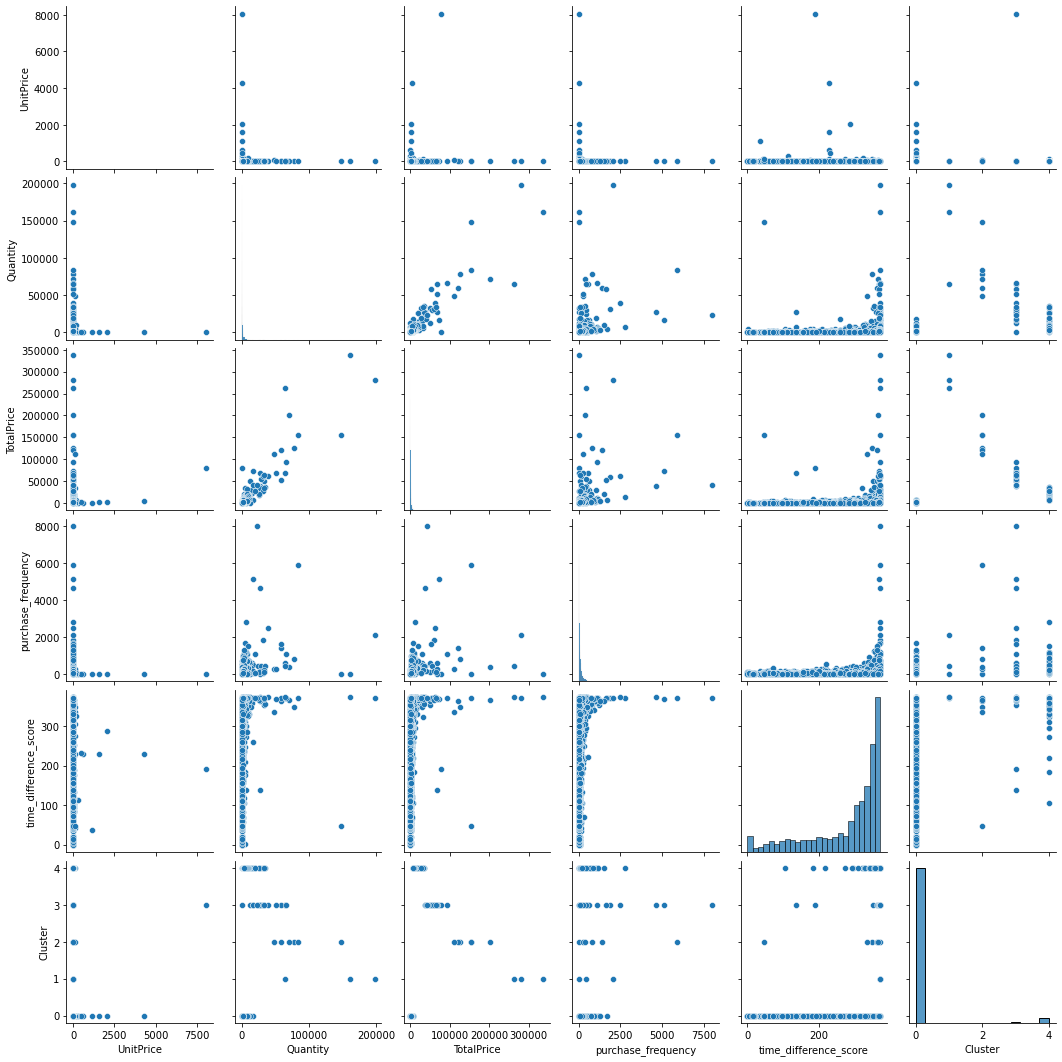

In [32]:
sns.pairplot(comm, vars=['UnitPrice', 'Quantity', 'TotalPrice', 'purchase_frequency', 'time_difference_score', 'Cluster'])
plt.show()

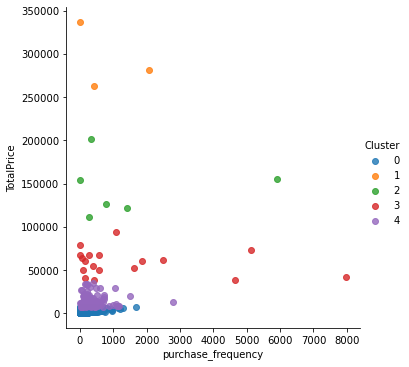

In [36]:
sns.lmplot(x='purchase_frequency', y='TotalPrice', data=comm, hue='Cluster', fit_reg=False)
plt.show()

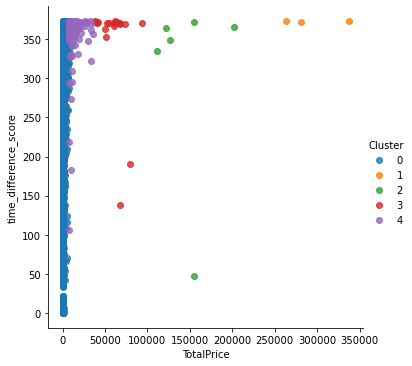

In [37]:
sns.lmplot(x='TotalPrice', y='time_difference_score', data=comm, hue='Cluster', fit_reg=False)
plt.show()

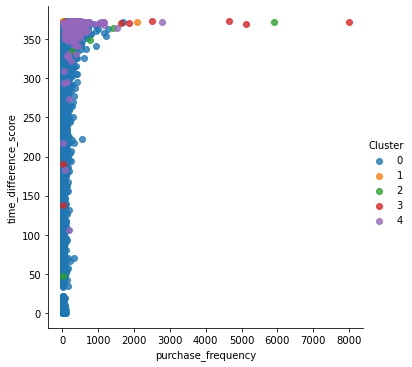

In [38]:
sns.lmplot(x='purchase_frequency', y='time_difference_score', data=comm, hue='Cluster', fit_reg=False)
plt.show()

In [39]:
comm

,UnitPrice,Quantity,TotalPrice,purchase_frequency,Country,last_purchase,time_difference_score,Cluster
CustomerID,,,,,,,,
12346.0,1.040000,148430,154367.20,2.0,United Kingdom,2017-01-16,48,2
12347.0,2.644011,2458,4310.00,182.0,Iceland,2017-12-05,371,0
12348.0,5.764839,2341,1797.24,31.0,Finland,2017-09-23,298,0
12349.0,8.289041,631,1757.55,73.0,Italy,2017-11-19,355,0
12350.0,3.841176,197,334.40,17.0,Norway,2017-01-31,63,0
...,...,...,...,...,...,...,...,...
18280.0,4.765000,45,180.60,10.0,United Kingdom,2017-03-05,96,0
18281.0,5.622857,54,80.82,7.0,United Kingdom,2017-06-10,193,0
18282.0,4.821538,108,179.50,13.0,United Kingdom,2017-11-30,366,0
